# TRSSF Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_trssf = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/trssf.csv')
df_trssf['Date'] = pd.to_datetime(df_trssf['Date'])
df_trssf = df_trssf.set_index('Date')
df_trssf = df_trssf.rename(columns={'Open':'trssf_Open', 'High':'trssf_High', 'Low':'trssf_Low', 'Close':'trssf_Close', 'Volume':'trssf_Volume'})
df_trssf = df_trssf.drop('Adj Close', axis=1)
df_trssf['trssf_prev_close'] = df_trssf['trssf_Close'].shift(1)
df_trssf['trssf_next_close'] = df_trssf['trssf_Close'].shift(-1)
df_trssf['trssf_diff'] = df_trssf['trssf_Close'].diff()
df_trssf['trssf_%change'] = df_trssf['trssf_Close'].pct_change()
df_trssf['trssf_5day_avg_close'] = df_trssf['trssf_Close'].rolling(5).mean()
df_trssf['trssf_5day_avg_diff'] = df_trssf['trssf_diff'].rolling(5).mean()
df_trssf['trssf_10day_avg_close'] = df_trssf['trssf_Close'].rolling(10).mean()
df_trssf['trssf_10day_avg_diff'] = df_trssf['trssf_diff'].rolling(10).mean()

In [4]:
df_trssf

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-17       3.919       3.940      3.660        3.670        100800   
2022-05-18       3.600       3.780      3.538        3.635        110700   
2022-05-19       3.520       3.830      3.520        3.735         61000   
2022-05-20       3.750       3.990      3.700        3.960         78800   
2022-05-23       3.970       4.080      3.840        3.990         39600   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17               NaN             1.478         NaN            NaN   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-17             3.868             3.635      -0.198      -0.051189   
2022-05-18             3.670             3.735      -0.035      -0.009537   
2022-05-19             3.635             3.960       0.100       0.027510   
2022-05-20             3.735             3.990       0.225       0.060241   
2022-05-23             3.960               NaN       0.030       0.007576   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                   NaN                  NaN                    NaN   
2017-11-20                   NaN                  NaN                    NaN   
2017-11-21                   NaN                  NaN                    NaN   
2017-11-22                   NaN                  NaN                    NaN   
2017-11-24                1.4506                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                3.7996              -0.0420                 3.8808   
2022-05-18                3.7666              -0.0330                 3.8273   
2022-05-19                3.7636              -0.0030                 3.8228   
2022-05-20                3.7736               0.0100                 3.8098   
2022-05-23                3.7980               0.0244                 3.8198   

            trssf_10day_avg_diff  
Date                              
2017-11-17                   NaN  
2017-11-20                   NaN  
2017-11-21                   NaN  
2017-11-22                   NaN  
2017-11-24                   NaN  
...                          ...  
2022-05-17               -0.0620  
2022-05-18               -0.0535  
2022-05-19               -0.0045  
2022-05-20               -0.0130  
2022-05-23                0.0100  

[1135 rows x 13 columns]

In [5]:
cut = df_trssf.index.min()
cut

Timestamp('2017-11-17 00:00:00')

Text(0.5, 0, 'TRSSF Close')

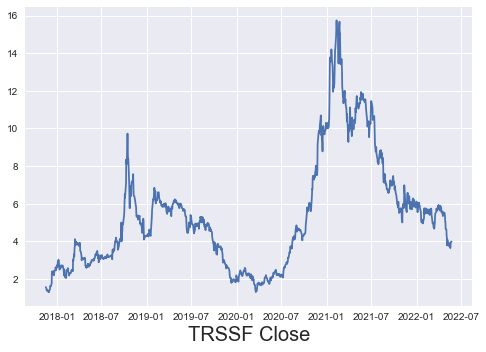

In [6]:
plt.plot(df_trssf['trssf_Close'])
plt.xlabel('TRSSF Close', fontsize=20)

## TRSSF and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-18   32468.67   32468.67  31393.95    31490.07  508465869.0   
2022-05-19   31262.62   31569.13  31016.41    31253.13  554268268.0   
2022-05-20   31426.94   31515.78  30635.76    31261.90  551025623.0   
2022-05-23   31395.89   31968.42  31395.89    31880.24  452693827.0   
2022-05-24   31717.61   32014.86  31365.59    31928.62  428081450.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-18         32654.59         31253.13   -1164.52     -0.035662   
2022-05-19         31490.07         31261.90    -236.94     -0.007524   
2022-05-20         31253.13         31880.24       8.77      0.000281   
2022-05-23         31261.90         31928.62     618.34      0.019779   
2022-05-24         31880.24              NaN      48.38      0.001518   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-18            32059.008             -68.808             32243.293   
2022-05-19            31963.574             -95.434             32068.809   
2022-05-20            31776.622            -186.952             31905.062   
2022-05-23            31707.986             -68.636             31868.516   
2022-05-24            31562.792            -145.194             31845.304   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-18             -257.099  
2022-05-19             -174.484  
2022-05-20             -163.747  
2022-05-23              -36.546  
2022-05-24              -23.212  

[32641 rows x 13 columns]

In [8]:
df0 = pd.merge(df_trssf, df_dow, on='Date', how='left')
df0

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-17       3.919       3.940      3.660        3.670        100800   
2022-05-18       3.600       3.780      3.538        3.635        110700   
2022-05-19       3.520       3.830      3.520        3.735         61000   
2022-05-20       3.750       3.990      3.700        3.960         78800   
2022-05-23       3.970       4.080      3.840        3.990         39600   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17               NaN             1.478         NaN            NaN   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-17             3.868             3.635      -0.198      -0.051189   
2022-05-18             3.670             3.735      -0.035      -0.009537   
2022-05-19             3.635             3.960       0.100       0.027510   
2022-05-20             3.735             3.990       0.225       0.060241   
2022-05-23             3.960               NaN       0.030       0.007576   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                   NaN                  NaN                    NaN   
2017-11-20                   NaN                  NaN                    NaN   
2017-11-21                   NaN                  NaN                    NaN   
2017-11-22                   NaN                  NaN                    NaN   
2017-11-24                1.4506                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                3.7996              -0.0420                 3.8808   
2022-05-18                3.7666              -0.0330                 3.8273   
2022-05-19                3.7636              -0.0030                 3.8228   
2022-05-20                3.7736               0.0100                 3.8098   
2022-05-23                3.7980               0.0244                 3.8198   

            trssf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2017-11-17                   NaN   23433.77   23433.77  23356.01    23358.24   
2017-11-20                   NaN   23370.71   23456.88  23360.58    23430.33   
2017-11-21                   NaN   23500.15   23617.80  23500.15    23590.83   
2017-11-22                   NaN   23597.24   23605.77  23507.61    23526.18   
2017-11-24                   NaN   23552.75   23599.18  23551.59    23557.99   
...                          ...        ...        ...       ...         ...   
2022-05-17               -0.0620   32427.00   32689.14  32308.15    32654.59   
2022-05-18               -0.0535   32468.67   32468.67  31393.95    31490.07   
2022-05-19               -0.0045   31262.62   31569.13  31016.41    31253.13   
2022-05-20               -0.0130   31426.94   31515.78  30635.76    31261.90   
2022-05-23          

In [9]:
df_isna0 = df0.isna()
df_isna0

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       False       False      False        False         False   
2017-11-20       False       False      False        False         False   
2017-11-21       False       False      False        False         False   
2017-11-22       False       False      False        False         False   
2017-11-24       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17              True             False        True           True   
2017-11-20             False             False       False          False   
2017-11-21             False             False       False          False   
2017-11-22             False             False       False          False   
2017-11-24             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                  True                 True                   True   
2017-11-20                  True                 True                   True   
2017-11-21                  True                 True                   True   
2017-11-22                  True                 True                   True   
2017-11-24                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            trssf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2017-11-17                  True      False      False     False       False   
2017-11-20                  True      False      False     False       False   
2017-11-21                  True      False      False     False       False   
2017-11-22                  True      False      False     False       False   
2017-11-24                  True      False      False     False       False   
...                          ...        ...        ...       ...         ...   
2022-05-17                 False      False      False     False       False   
2022-05-18                 False      False      False     False       False   
2022-05-19                 False      False      False     False       False   
2022-05-20                 False      False      False     False       False   
2022-05-23          

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17             0.000             1.478       0.000       0.000000   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                0.0000                  0.0                    0.0   
2017-11-20                0.0000                  0.0                    0.0   
2017-11-21                0.0000                  0.0                    0.0   
2017-11-22                0.0000                  0.0                    0.0   
2017-11-24                1.4506                  0.0                    0.0   

            trssf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2017-11-17                   0.0   23433.77   23433.77  23356.01    23358.24   
2017-11-20                   0.0   23370.71   23456.88  23360.58    23430.33   
2017-11-21                   0.0   23500.15   23617.80  23500.15    23590.83   
2017-11-22                   0.0   23597.24   23605.77  23507.61    23526.18   
2017-11-24                   0.0   23552.75   23599.18  23551.59    23557.99   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2017-11-17  385970664.0         23458.36         23430.33    -100.12   
2017-11-20  315237090.0         23358.24         23590.83      72.09   
2017-11-21  329720122.0         23430.33         23526.18     160.50   
2017-11-22  268703079.0         23590.83         23557.99     -64.65   
2017-11-24  118640439.0         23526.18         23580.78      31.81   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2017-11-17     -0.004268            23387.410             -12.794   
2017-11-20      0.003086            23385.536              -1.874   
2017-11-21      0.006850            23421.808              36.272   
2017-11-22     -0.002740            23472.788              50.980   
2017-11-24      0.001352            23492.714              19.926   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2017-11-17             23449.021              -18.095  
2017-11-20             23437.212              -11.809  
2017-11-21             23440.572                3.360  
2017-11-22             23436.854               -3.718  
2017-11-24             23446.459                9.605

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-17       3.919       3.940      3.660        3.670        100800   
2022-05-18       3.600       3.780      3.538        3.635        110700   
2022-05-19       3.520       3.830      3.520        3.735         61000   
2022-05-20       3.750       3.990      3.700        3.960         78800   
2022-05-23       3.970       4.080      3.840        3.990         39600   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17             0.000             1.478       0.000       0.000000   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-17             3.868             3.635      -0.198      -0.051189   
2022-05-18             3.670             3.735      -0.035      -0.009537   
2022-05-19             3.635             3.960       0.100       0.027510   
2022-05-20             3.735             3.990       0.225       0.060241   
2022-05-23             3.960             0.000       0.030       0.007576   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                0.0000               0.0000                 0.0000   
2017-11-20                0.0000               0.0000                 0.0000   
2017-11-21                0.0000               0.0000                 0.0000   
2017-11-22                0.0000               0.0000                 0.0000   
2017-11-24                1.4506               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-17                3.7996              -0.0420                 3.8808   
2022-05-18                3.7666              -0.0330                 3.8273   
2022-05-19                3.7636              -0.0030                 3.8228   
2022-05-20                3.7736               0.0100                 3.8098   
2022-05-23                3.7980               0.0244                 3.8198   

            trssf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2017-11-17                0.0000   23433.77   23433.77  23356.01    23358.24   
2017-11-20                0.0000   23370.71   23456.88  23360.58    23430.33   
2017-11-21                0.0000   23500.15   23617.80  23500.15    23590.83   
2017-11-22                0.0000   23597.24   23605.77  23507.61    23526.18   
2017-11-24                0.0000   23552.75   23599.18  23551.59    23557.99   
...                          ...        ...        ...       ...         ...   
2022-05-17               -0.0620   32427.00   32689.14  32308.15    32654.59   
2022-05-18               -0.0535   32468.67   32468.67  31393.95    31490.07   
2022-05-19               -0.0045   31262.62   31569.13  31016.41    31253.13   
2022-05-20               -0.0130   31426.94   31515.78  30635.76    31261.90   
2022-05-23          

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'trssf_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2017-11-17     11   17  2017        4       1.592       1.592      1.495   
2017-11-20     11   20  2017        4       1.562       1.562      1.396   
2017-11-21     11   21  2017        4       1.451       1.478      1.379   
2017-11-22     11   22  2017        4       1.350       1.430      1.338   
2017-11-24     11   24  2017        4       1.460       1.460      1.421   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_next_close  \
Date                                                                        
2017-11-17        1.565         91400             0.000             1.478   
2017-11-20        1.478        287000             1.565             1.379   
2017-11-21        1.379        230900             1.478             1.410   
2017-11-22        1.410        211800             1.379             1.421   
2017-11-24        1.421         26000             1.410             1.342   

            trssf_diff  trssf_%change  trssf_5day_avg_close  \
Date                                                          
2017-11-17       0.000       0.000000                0.0000   
2017-11-20      -0.087      -0.055591                0.0000   
2017-11-21      -0.099      -0.066982                0.0000   
2017-11-22       0.031       0.022480                0.0000   
2017-11-24       0.011       0.007801                1.4506   

            trssf_5day_avg_diff  trssf_10day_avg_close  trssf_10day_avg_diff  \
Date                                                                           
2017-11-17                  0.0                    0.0                   0.0   
2017-11-20                  0.0                    0.0                   0.0   
2017-11-21                  0.0                    0.0                   0.0   
2017-11-22                  0.0                    0.0                   0.0   
2017-11-24                  0.0                    0.0                   0.0   

            djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
2017-11-17   23433.77   23433.77  23356.01    23358.24  385970664.0   
2017-11-20   23370.71   23456.88  23360.58    23430.33  315237090.0   
2017-11-21   23500.15   23617.80  23500.15    23590.83  329720122.0   
2017-11-22   23597.24   23605.77  23507.61    23526.18  268703079.0   
2017-11-24   23552.75   23599.18  23551.59    23557.99  118640439.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
2017-11-17         23458.36         23430.33    -100.12     -0.004268   
2017-11-20         23358.24         23590.83      72.09      0.003086   
2017-11-21         23430.33         23526.18     160.50      0.006850   
2017-11-22         23590.83         23557.99     -64.65     -0.002740   
2017-11-24         23526.18         23580.78      31.81      0.001352   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
2017-11-17            23387.410             -12.794             23449.021   
2017-11-20            23385.536              -1.874             23437.212   
2017-11-21            23421.808              36.272             23440.572   
2017-11-22            23472.788              50.980             23436.854   
2017-11-24            23492.714              19.926             23446.459   

            djix_10day_avg_diff  trssf_Open_b  trssf_High_b  trssf_Low_b  \
Date                                                                       
2017-11-17              -18.095         False         False        False   
2017-11-20              -11.809         False         False        False   
2017-11-21                3.360         False         False        False   
2017-1

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(1134, 56)

In [18]:
n = int(len(df0) * 0.9)
n

1020

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

1020
114


In [21]:
X_train0 = train0.drop('trssf_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2017-11-17     11   17  2017        4       1.592       1.592      1.495   
2017-11-20     11   20  2017        4       1.562       1.562      1.396   
2017-11-21     11   21  2017        4       1.451       1.478      1.379   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_diff  \
Date                                                                  
2017-11-17        1.565         91400             0.000       0.000   
2017-11-20        1.478        287000             1.565      -0.087   
2017-11-21        1.379        230900             1.478      -0.099   

            trssf_%change  trssf_5day_avg_close  trssf_5day_avg_diff  \
Date                                                                   
2017-11-17       0.000000                   0.0                  0.0   
2017-11-20      -0.055591                   0.0                  0.0   
2017-11-21      -0.066982                   0.0                  0.0   

            trssf_10day_avg_close  trssf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2017-11-17                    0.0                   0.0   23433.77   23433.77   
2017-11-20                    0.0                   0.0   23370.71   23456.88   
2017-11-21                    0.0                   0.0   23500.15   23617.80   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2017-11-17  23356.01    23358.24  385970664.0         23458.36   
2017-11-20  23360.58    23430.33  315237090.0         23358.24   
2017-11-21  23500.15    23590.83  329720122.0         23430.33   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2017-11-17         23430.33    -100.12     -0.004268            23387.410   
2017-11-20         23590.83      72.09      0.003086            23385.536   
2017-11-21         23526.18     160.50      0.006850            23421.808   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2017-11-17             -12.794             23449.021              -18.095   
2017-11-20              -1.874             23437.212              -11.809   
2017-11-21              36.272             23440.572                3.360   

            trssf_Open_b  trssf_High_b  trssf_Low_b  trssf_Close_b  \
Date                                                                 
2017-11-17         False         False        False          False   
2017-11-20         False         False        False          False   
2017-11-21         False         False        False          False   

            trssf_Volume_b  trssf_prev_close_b  trssf_next_close_b  \
Date                                                                 
2017-11-17           False                True               False   
2017-11-20           False               False               False   
2017-11-21           False               False               False   

            trssf_diff_b  trssf_%change_b  trssf_5day_avg_close_b  \
Date                                                                
2017-11-17          True             True                    True   
2017-11-20         False            False                    True   
2017-11-21         False            False                    True   

            trssf_5day_avg_diff_b  trssf_10day_avg_close_b  \
Date                                                         
2017-11-17                   True                     True   
2017-11-20                   True                     True   
2017-11-21                   True                     True   

            trssf_10day_avg_diff_b  djix_Open_

In [22]:
X_train0.shape

(1020, 55)

In [23]:
y_train0 = train0['trssf_next_close']
y_train0.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-12-03    5.72
2021-12-06    5.72
2021-12-07    5.94
Name: trssf_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('trssf_next_close', axis=1)
y_test0 = test0['trssf_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2021-12-08     12    8  2021        4        5.55        6.10       5.55   
2021-12-09     12    9  2021        4        6.38        6.53       5.75   
2021-12-10     12   10  2021        4        5.97        6.28       5.97   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_diff  \
Date                                                                  
2021-12-08        5.940        237300              5.72       0.220   
2021-12-09        6.090        281400              5.94       0.150   
2021-12-10        6.053         90500              6.09      -0.037   

            trssf_%change  trssf_5day_avg_close  trssf_5day_avg_diff  \
Date                                                                   
2021-12-08       0.038462                6.0020              -0.0220   
2021-12-09       0.025253                5.9400              -0.0620   
2021-12-10      -0.006076                5.9046              -0.0354   

            trssf_10day_avg_close  trssf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2021-12-08                 6.1314               -0.0115   35716.85   35840.52   
2021-12-09                 6.0894               -0.0420   35722.26   35864.24   
2021-12-10                 6.0367               -0.0527   35830.55   35982.69   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2021-12-08  35602.65    35754.75  439232631.0         35719.43   
2021-12-09  35577.14    35754.69  404814439.0         35754.75   
2021-12-10  35710.43    35970.99  404517391.0         35754.69   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2021-12-08         35754.69      35.32      0.000989            35184.216   
2021-12-09         35970.99      -0.06     -0.000002            35407.196   
2021-12-10         35650.95     216.30      0.006050            35685.378   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2021-12-08             346.542             35026.650               -5.905   
2021-12-09             222.980             35021.681               -4.969   
2021-12-10             278.182             35128.846              107.165   

            trssf_Open_b  trssf_High_b  trssf_Low_b  trssf_Close_b  \
Date                                                                 
2021-12-08         False         False        False          False   
2021-12-09         False         False        False          False   
2021-12-10         False         False        False          False   

            trssf_Volume_b  trssf_prev_close_b  trssf_next_close_b  \
Date                                                                 
2021-12-08           False               False               False   
2021-12-09           False               False               False   
2021-12-10           False               False               False   

            trssf_diff_b  trssf_%change_b  trssf_5day_avg_close_b  \
Date                                                                
2021-12-08         False            False                   False   
2021-12-09         False            False                   False   
2021-12-10         False            False                   False   

            trssf_5day_avg_diff_b  trssf_10day_avg_close_b  \
Date                                                         
2021-12-08                  False                    False   
2021-12-09                  False                    False   
2021-12-10                  False                    False   

            trssf_10day_avg_diff_b  djix_Open_

In [27]:
X_test0.shape

(114, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-18    3.735
2022-05-19    3.960
2022-05-20    3.990
Name: trssf_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([5.861746  , 5.98749591, 6.03333732, 5.61743326, 5.84603131])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.18686329767964685


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.1481971885181531


In [34]:
y_train0 = pd.DataFrame(y_train0, columns=['trssf_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['trssf_next_close'])

In [35]:
y_test0['trssf_pred_next_close'] = y_pred0

In [36]:
y_test0.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-16             3.670               3.960127
2022-05-17             3.635               3.629634
2022-05-18             3.735               3.590513
2022-05-19             3.960               3.654606
2022-05-20             3.990               4.032301

In [37]:
hyper_table.append(dict(stock='trssf', 
                        version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        actual_price=y_test0['trssf_next_close'][-1],
                        predicted_price=y_test0['trssf_pred_next_close'][-1],
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

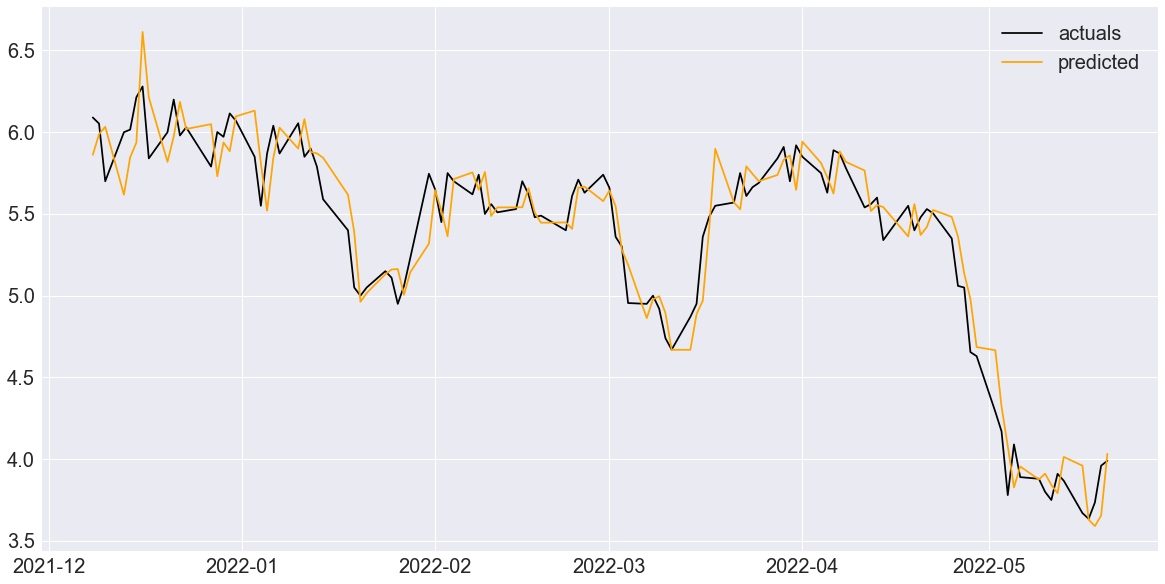

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['trssf_next_close'], color='black')
ax.plot(y_test0['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## TRSSF and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_trssf, df_etfs, on='Date', how='left')
df1

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-17       3.919       3.940      3.660        3.670        100800   
2022-05-18       3.600       3.780      3.538        3.635        110700   
2022-05-19       3.520       3.830      3.520        3.735         61000   
2022-05-20       3.750       3.990      3.700        3.960         78800   
2022-05-23       3.970       4.080      3.840        3.990         39600   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17               NaN             1.478         NaN            NaN   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-17             3.868             3.635      -0.198      -0.051189   
2022-05-18             3.670             3.735      -0.035      -0.009537   
2022-05-19             3.635             3.960       0.100       0.027510   
2022-05-20             3.735             3.990       0.225       0.060241   
2022-05-23             3.960               NaN       0.030       0.007576   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                   NaN                  NaN                    NaN   
2017-11-20                   NaN                  NaN                    NaN   
2017-11-21                   NaN                  NaN                    NaN   
2017-11-22                   NaN                  NaN                    NaN   
2017-11-24                1.4506                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                3.7996              -0.0420                 3.8808   
2022-05-18                3.7666              -0.0330                 3.8273   
2022-05-19                3.7636              -0.0030                 3.8228   
2022-05-20                3.7736               0.0100                 3.8098   
2022-05-23                3.7980               0.0244                 3.8198   

            trssf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2017-11-17                   NaN  29.889999  29.889999  29.629999  29.761000   
2017-11-20                   NaN  29.980000  29.980000  29.532000  29.600000   
2017-11-21                   NaN  29.500000  29.701000  29.440001  29.540001   
2017-11-22                   NaN  29.639999  29.639999  29.226000  29.549000   
2017-11-24                   NaN  29.879999  29.879999  29.650000  29.732000   
...                          ...        ...        ...        ...        ...   
2022-05-17               -0.0620   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.0535   7.940000   8.030000   7.605000   7.620000   
2022-05-19               -0.0045   7.560000   7.860000   7.540000   7.780000   
2022-05-20               -0.0130   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [41]:
df_isna1 = df1.isna()
df_isna1

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       False       False      False        False         False   
2017-11-20       False       False      False        False         False   
2017-11-21       False       False      False        False         False   
2017-11-22       False       False      False        False         False   
2017-11-24       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17              True             False        True           True   
2017-11-20             False             False       False          False   
2017-11-21             False             False       False          False   
2017-11-22             False             False       False          False   
2017-11-24             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                  True                 True                   True   
2017-11-20                  True                 True                   True   
2017-11-21                  True                 True                   True   
2017-11-22                  True                 True                   True   
2017-11-24                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            trssf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2017-11-17                  True    False    False   False     False   
2017-11-20                  True    False    False   False     False   
2017-11-21                  True    False    False   False     False   
2017-11-22                  True    False    False   False     False   
2017-11-24                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-17                 False    False    False   False     False   
2022-05-18                 False    False    False   False     False   
2022-05-19                 False    False    False   False     False   
2022-05-20                 False    False    False   False     False   
2022-05-23                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17             0.000             1.478       0.000       0.000000   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                0.0000                  0.0                    0.0   
2017-11-20                0.0000                  0.0                    0.0   
2017-11-21                0.0000                  0.0                    0.0   
2017-11-22                0.0000                  0.0                    0.0   
2017-11-24                1.4506                  0.0                    0.0   

            trssf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2017-11-17                   0.0  29.889999  29.889999  29.629999  29.761000   
2017-11-20                   0.0  29.980000  29.980000  29.532000  29.600000   
2017-11-21                   0.0  29.500000  29.701000  29.440001  29.540001   
2017-11-22                   0.0  29.639999  29.639999  29.226000  29.549000   
2017-11-24                   0.0  29.879999  29.879999  29.650000  29.732000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2017-11-17       5000      29.430000      29.600000  0.331000    0.011247   
2017-11-20       8400      29.761000      29.540001 -0.161000   -0.005410   
2017-11-21       5300      29.600000      29.549000 -0.059999   -0.002027   
2017-11-22       5000      29.540001      29.732000  0.008999    0.000305   
2017-11-24       4600      29.549000      29.730000  0.183000    0.006193   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2017-11-17            29.3630            0.0022             29.7103   
2017-11-20            29.3838            0.0208             29.6483   
2017-11-21            29.4618            0.0780             29.5925   
2017-11-22            29.5760            0.1142             29.5274   
2017-11-24            29.6364            0.0604             29.4986   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2017-11-17            -0.0459        0.0        0.0       0.0         0.0   
2017-11-20            -0.0620        0.0        0.0       0.0         0.0   
2017-11-21            -0.0558        0.0        0.0       0.0         0.0   
2017-11-22            -0.0651        0.0        0.0       0.0         0.0   
2017-11-24            -0.0288        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2017-11-17          0.0              0.0              0.0        0.0   
2017-11-20          0.0

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-17       3.919       3.940      3.660        3.670        100800   
2022-05-18       3.600       3.780      3.538        3.635        110700   
2022-05-19       3.520       3.830      3.520        3.735         61000   
2022-05-20       3.750       3.990      3.700        3.960         78800   
2022-05-23       3.970       4.080      3.840        3.990         39600   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17             0.000             1.478       0.000       0.000000   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-17             3.868             3.635      -0.198      -0.051189   
2022-05-18             3.670             3.735      -0.035      -0.009537   
2022-05-19             3.635             3.960       0.100       0.027510   
2022-05-20             3.735             3.990       0.225       0.060241   
2022-05-23             3.960             0.000       0.030       0.007576   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                0.0000               0.0000                 0.0000   
2017-11-20                0.0000               0.0000                 0.0000   
2017-11-21                0.0000               0.0000                 0.0000   
2017-11-22                0.0000               0.0000                 0.0000   
2017-11-24                1.4506               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-17                3.7996              -0.0420                 3.8808   
2022-05-18                3.7666              -0.0330                 3.8273   
2022-05-19                3.7636              -0.0030                 3.8228   
2022-05-20                3.7736               0.0100                 3.8098   
2022-05-23                3.7980               0.0244                 3.8198   

            trssf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2017-11-17                0.0000  29.889999  29.889999  29.629999  29.761000   
2017-11-20                0.0000  29.980000  29.980000  29.532000  29.600000   
2017-11-21                0.0000  29.500000  29.701000  29.440001  29.540001   
2017-11-22                0.0000  29.639999  29.639999  29.226000  29.549000   
2017-11-24                0.0000  29.879999  29.879999  29.650000  29.732000   
...                          ...        ...        ...        ...        ...   
2022-05-17               -0.0620   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.0535   7.940000   8.030000   7.605000   7.620000   
2022-05-19               -0.0045   7.560000   7.860000   7.540000   7.780000   
2022-05-20               -0.0130   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'trssf_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2017-11-17     11   17  2017        4       1.592       1.592      1.495   
2017-11-20     11   20  2017        4       1.562       1.562      1.396   
2017-11-21     11   21  2017        4       1.451       1.478      1.379   
2017-11-22     11   22  2017        4       1.350       1.430      1.338   
2017-11-24     11   24  2017        4       1.460       1.460      1.421   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-17      5   17  2022        2       3.919       3.940      3.660   
2022-05-18      5   18  2022        2       3.600       3.780      3.538   
2022-05-19      5   19  2022        2       3.520       3.830      3.520   
2022-05-20      5   20  2022        2       3.750       3.990      3.700   
2022-05-23      5   23  2022        2       3.970       4.080      3.840   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_next_close  \
Date                                                                        
2017-11-17        1.565         91400             0.000             1.478   
2017-11-20        1.478        287000             1.565             1.379   
2017-11-21        1.379        230900             1.478             1.410   
2017-11-22        1.410        211800             1.379             1.421   
2017-11-24        1.421         26000             1.410             1.342   
...                 ...           ...               ...               ...   
2022-05-17        3.670        100800             3.868             3.635   
2022-05-18        3.635        110700             3.670             3.735   
2022-05-19        3.735         61000             3.635             3.960   
2022-05-20        3.960         78800             3.735             3.990   
2022-05-23        3.990         39600             3.960             0.000   

            trssf_diff  trssf_%change  trssf_5day_avg_close  \
Date                                                          
2017-11-17       0.000       0.000000                0.0000   
2017-11-20      -0.087      -0.055591                0.0000   
2017-11-21      -0.099      -0.066982                0.0000   
2017-11-22       0.031       0.022480                0.0000   
2017-11-24       0.011       0.007801                1.4506   
...                ...            ...                   ...   
2022-05-17      -0.198      -0.051189                3.7996   
2022-05-18      -0.035      -0.009537                3.7666   
2022-05-19       0.100       0.027510                3.7636   
2022-05-20       0.225       0.060241                3.7736   
2022-05-23       0.030       0.007576                3.7980   

            trssf_5day_avg_diff  trssf_10day_avg_close  trssf_10day_avg_diff  \
Date                                                                           
2017-11-17               0.0000                 0.0000                0.0000   
2017-11-20               0.0000                 0.0000                0.0000   
2017-11-21               0.0000                 0.0000                0.0000   
2017-11-22               0.0000                 0.0000                0.0000   
2017-11-24               0.0000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-17              -0.0420                 3.8808               -0.0620   
2022-05-18              -0.0330                 3.8273               -0.0535   
2022-05-19              -0.0030                 3.8228               -0.0045   
2022-05-20               0.0100                 3.8098               -0.0130   
2022-05-23               0.0244                 3.8198                0.0100   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2017-11-17  29.889999 

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

1020

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

1020
114


In [52]:
X_train1 = train1.drop('trssf_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2017-11-17     11   17  2017        4       1.592       1.592      1.495   
2017-11-20     11   20  2017        4       1.562       1.562      1.396   
2017-11-21     11   21  2017        4       1.451       1.478      1.379   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_diff  \
Date                                                                  
2017-11-17        1.565         91400             0.000       0.000   
2017-11-20        1.478        287000             1.565      -0.087   
2017-11-21        1.379        230900             1.478      -0.099   

            trssf_%change  trssf_5day_avg_close  trssf_5day_avg_diff  \
Date                                                                   
2017-11-17       0.000000                   0.0                  0.0   
2017-11-20      -0.055591                   0.0                  0.0   
2017-11-21      -0.066982                   0.0                  0.0   

            trssf_10day_avg_close  trssf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2017-11-17                    0.0                   0.0  29.889999  29.889999   
2017-11-20                    0.0                   0.0  29.980000  29.980000   
2017-11-21                    0.0                   0.0  29.500000  29.701000   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2017-11-17  29.629999  29.761000       5000         29.430      29.600000   
2017-11-20  29.532000  29.600000       8400         29.761      29.540001   
2017-11-21  29.440001  29.540001       5300         29.600      29.549000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2017-11-17  0.331000    0.011247            29.3630            0.0022   
2017-11-20 -0.161000   -0.005410            29.3838            0.0208   
2017-11-21 -0.059999   -0.002027            29.4618            0.0780   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2017-11-17             29.7103            -0.0459        0.0        0.0   
2017-11-20             29.6483            -0.0620        0.0        0.0   
2017-11-21             29.5925            -0.0558        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2017-11-17       0.0         0.0          0.0              0.0   
2017-11-20       0.0         0.0          0.0              0.0   
2017-11-21       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2017-11-17              0.0        0.0           0.0                  0.0   
2017-11-20              0.0        0.0           0.0                  0.0   
2017-11-21              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2017-11-17                 0.0                   0.0                  0.0   
2017-11-20                 0.0                   0.0                  0.0   
2017-11-21                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2017-11-17        0.0        0.0       0.0         0.0          0.0   
2017-11-20        0.0        0.0       0.0         0.0          

In [53]:
X_train1.shape

(1020, 159)

In [54]:
y_train1 = train1['trssf_next_close']
y_train1.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-12-03    5.72
2021-12-06    5.72
2021-12-07    5.94
Name: trssf_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('trssf_next_close', axis=1)
y_test1 = test1['trssf_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2021-12-08     12    8  2021        4        5.55        6.10       5.55   
2021-12-09     12    9  2021        4        6.38        6.53       5.75   
2021-12-10     12   10  2021        4        5.97        6.28       5.97   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_diff  \
Date                                                                  
2021-12-08        5.940        237300              5.72       0.220   
2021-12-09        6.090        281400              5.94       0.150   
2021-12-10        6.053         90500              6.09      -0.037   

            trssf_%change  trssf_5day_avg_close  trssf_5day_avg_diff  \
Date                                                                   
2021-12-08       0.038462                6.0020              -0.0220   
2021-12-09       0.025253                5.9400              -0.0620   
2021-12-10      -0.006076                5.9046              -0.0354   

            trssf_10day_avg_close  trssf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2021-12-08                 6.1314               -0.0115    11.94   12.298   
2021-12-09                 6.0894               -0.0420    12.09   12.210   
2021-12-10                 6.0367               -0.0527    11.80   11.930   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2021-12-08   11.77     12.19     875600          11.95          11.71   
2021-12-09   11.67     11.71     898900          12.19          11.45   
2021-12-10   11.42     11.45    1569900          11.71          11.55   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2021-12-08     0.24    0.020084             11.738             0.148   
2021-12-09    -0.48   -0.039377             11.738             0.000   
2021-12-10    -0.26   -0.022203             11.762             0.024   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-12-08              12.016             -0.062  25.370001  26.832001   
2021-12-09              11.886             -0.130  26.480000  26.740000   
2021-12-10              11.763             -0.123  26.340000  26.500000   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2021-12-08  24.938999   26.799999    2097700.0        25.340000   
2021-12-09  25.950001   26.350000    1801400.0        26.799999   
2021-12-10  25.750000   26.059999     773500.0        26.350000   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-12-08        26.350000   1.459999      0.057616               26.006   
2021-12-09        26.059999  -0.449999     -0.016791               25.984   
2021-12-10        24.879999  -0.290001     -0.011006               25.898   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-12-08               0.260                26.663               -0.130   
2021-12-09              -0.022                26.431               -0.232   
2021-12-10              -0.086                26.184               -0.247   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2021-12-08      14.12     14.687     14.00       14.54     114000.0   
2021-12-09      14.54     14.580     14.14       14.20      61600.0   
2021-12-10      14.18     14.264 

In [58]:
X_test1.shape

(114, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-18    3.735
2022-05-19    3.960
2022-05-20    3.990
Name: trssf_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([5.8233654 , 5.97024918, 5.80181849, 5.58403135, 6.03065123])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.16210366830167303


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.1264054524628652


In [64]:
y_train1 = pd.DataFrame(y_train1, columns=['trssf_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['trssf_next_close'])

In [65]:
y_test1['trssf_pred_next_close'] = y_pred1

In [66]:
y_test1.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-16             3.670               3.832632
2022-05-17             3.635               3.517463
2022-05-18             3.735               3.766657
2022-05-19             3.960               3.787743
2022-05-20             3.990               3.773157

In [67]:
hyper_table.append(dict(stock='trssf', 
                        version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        actual_price=y_test1['trssf_next_close'][-1],
                        predicted_price=y_test1['trssf_pred_next_close'][-1],
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

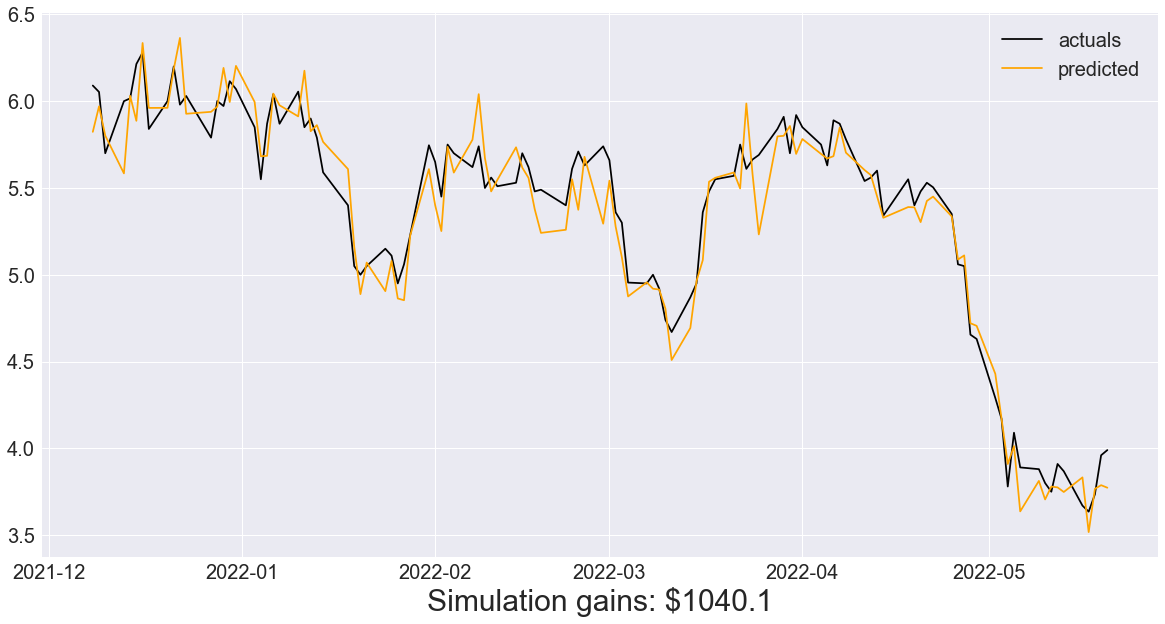

In [230]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['trssf_next_close'], color='black')
ax.plot(y_test1['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.xlabel('Simulation gains: $' + str(round(total_gains, 2)), fontsize=30)
plt.show()

## TRSSF, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_trssf, df_etfs_dow, on='Date', how='left')
df2

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-17       3.919       3.940      3.660        3.670        100800   
2022-05-18       3.600       3.780      3.538        3.635        110700   
2022-05-19       3.520       3.830      3.520        3.735         61000   
2022-05-20       3.750       3.990      3.700        3.960         78800   
2022-05-23       3.970       4.080      3.840        3.990         39600   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17               NaN             1.478         NaN            NaN   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-17             3.868             3.635      -0.198      -0.051189   
2022-05-18             3.670             3.735      -0.035      -0.009537   
2022-05-19             3.635             3.960       0.100       0.027510   
2022-05-20             3.735             3.990       0.225       0.060241   
2022-05-23             3.960               NaN       0.030       0.007576   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                   NaN                  NaN                    NaN   
2017-11-20                   NaN                  NaN                    NaN   
2017-11-21                   NaN                  NaN                    NaN   
2017-11-22                   NaN                  NaN                    NaN   
2017-11-24                1.4506                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17                3.7996              -0.0420                 3.8808   
2022-05-18                3.7666              -0.0330                 3.8273   
2022-05-19                3.7636              -0.0030                 3.8228   
2022-05-20                3.7736               0.0100                 3.8098   
2022-05-23                3.7980               0.0244                 3.8198   

            trssf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2017-11-17                   NaN  29.889999  29.889999  29.629999  29.761000   
2017-11-20                   NaN  29.980000  29.980000  29.532000  29.600000   
2017-11-21                   NaN  29.500000  29.701000  29.440001  29.540001   
2017-11-22                   NaN  29.639999  29.639999  29.226000  29.549000   
2017-11-24                   NaN  29.879999  29.879999  29.650000  29.732000   
...                          ...        ...        ...        ...        ...   
2022-05-17               -0.0620   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.0535   7.940000   8.030000   7.605000   7.620000   
2022-05-19               -0.0045   7.560000   7.860000   7.540000   7.780000   
2022-05-20               -0.0130   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [71]:
df_isna2 = df2.isna()
df_isna2

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       False       False      False        False         False   
2017-11-20       False       False      False        False         False   
2017-11-21       False       False      False        False         False   
2017-11-22       False       False      False        False         False   
2017-11-24       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17              True             False        True           True   
2017-11-20             False             False       False          False   
2017-11-21             False             False       False          False   
2017-11-22             False             False       False          False   
2017-11-24             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                  True                 True                   True   
2017-11-20                  True                 True                   True   
2017-11-21                  True                 True                   True   
2017-11-22                  True                 True                   True   
2017-11-24                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            trssf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2017-11-17                  True    False    False   False     False   
2017-11-20                  True    False    False   False     False   
2017-11-21                  True    False    False   False     False   
2017-11-22                  True    False    False   False     False   
2017-11-24                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-17                 False    False    False   False     False   
2022-05-18                 False    False    False   False     False   
2022-05-19                 False    False    False   False     False   
2022-05-20                 False    False    False   False     False   
2022-05-23                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17             0.000             1.478       0.000       0.000000   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                0.0000                  0.0                    0.0   
2017-11-20                0.0000                  0.0                    0.0   
2017-11-21                0.0000                  0.0                    0.0   
2017-11-22                0.0000                  0.0                    0.0   
2017-11-24                1.4506                  0.0                    0.0   

            trssf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2017-11-17                   0.0  29.889999  29.889999  29.629999  29.761000   
2017-11-20                   0.0  29.980000  29.980000  29.532000  29.600000   
2017-11-21                   0.0  29.500000  29.701000  29.440001  29.540001   
2017-11-22                   0.0  29.639999  29.639999  29.226000  29.549000   
2017-11-24                   0.0  29.879999  29.879999  29.650000  29.732000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2017-11-17       5000      29.430000      29.600000  0.331000    0.011247   
2017-11-20       8400      29.761000      29.540001 -0.161000   -0.005410   
2017-11-21       5300      29.600000      29.549000 -0.059999   -0.002027   
2017-11-22       5000      29.540001      29.732000  0.008999    0.000305   
2017-11-24       4600      29.549000      29.730000  0.183000    0.006193   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2017-11-17            29.3630            0.0022             29.7103   
2017-11-20            29.3838            0.0208             29.6483   
2017-11-21            29.4618            0.0780             29.5925   
2017-11-22            29.5760            0.1142             29.5274   
2017-11-24            29.6364            0.0604             29.4986   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2017-11-17            -0.0459        0.0        0.0       0.0         0.0   
2017-11-20            -0.0620        0.0        0.0       0.0         0.0   
2017-11-21            -0.0558        0.0        0.0       0.0         0.0   
2017-11-22            -0.0651        0.0        0.0       0.0         0.0   
2017-11-24            -0.0288        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2017-11-17          0.0              0.0              0.0        0.0   
2017-11-20          0.0

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-17       3.919       3.940      3.660        3.670        100800   
2022-05-18       3.600       3.780      3.538        3.635        110700   
2022-05-19       3.520       3.830      3.520        3.735         61000   
2022-05-20       3.750       3.990      3.700        3.960         78800   
2022-05-23       3.970       4.080      3.840        3.990         39600   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17             0.000             1.478       0.000       0.000000   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-17             3.868             3.635      -0.198      -0.051189   
2022-05-18             3.670             3.735      -0.035      -0.009537   
2022-05-19             3.635             3.960       0.100       0.027510   
2022-05-20             3.735             3.990       0.225       0.060241   
2022-05-23             3.960             0.000       0.030       0.007576   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                0.0000               0.0000                 0.0000   
2017-11-20                0.0000               0.0000                 0.0000   
2017-11-21                0.0000               0.0000                 0.0000   
2017-11-22                0.0000               0.0000                 0.0000   
2017-11-24                1.4506               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-17                3.7996              -0.0420                 3.8808   
2022-05-18                3.7666              -0.0330                 3.8273   
2022-05-19                3.7636              -0.0030                 3.8228   
2022-05-20                3.7736               0.0100                 3.8098   
2022-05-23                3.7980               0.0244                 3.8198   

            trssf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2017-11-17                0.0000  29.889999  29.889999  29.629999  29.761000   
2017-11-20                0.0000  29.980000  29.980000  29.532000  29.600000   
2017-11-21                0.0000  29.500000  29.701000  29.440001  29.540001   
2017-11-22                0.0000  29.639999  29.639999  29.226000  29.549000   
2017-11-24                0.0000  29.879999  29.879999  29.650000  29.732000   
...                          ...        ...        ...        ...        ...   
2022-05-17               -0.0620   7.990000   8.170000   7.880000   8.100000   
2022-05-18               -0.0535   7.940000   8.030000   7.605000   7.620000   
2022-05-19               -0.0045   7.560000   7.860000   7.540000   7.780000   
2022-05-20               -0.0130   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'trssf_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2017-11-17     11   17  2017        4       1.592       1.592      1.495   
2017-11-20     11   20  2017        4       1.562       1.562      1.396   
2017-11-21     11   21  2017        4       1.451       1.478      1.379   
2017-11-22     11   22  2017        4       1.350       1.430      1.338   
2017-11-24     11   24  2017        4       1.460       1.460      1.421   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-17      5   17  2022        2       3.919       3.940      3.660   
2022-05-18      5   18  2022        2       3.600       3.780      3.538   
2022-05-19      5   19  2022        2       3.520       3.830      3.520   
2022-05-20      5   20  2022        2       3.750       3.990      3.700   
2022-05-23      5   23  2022        2       3.970       4.080      3.840   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_next_close  \
Date                                                                        
2017-11-17        1.565         91400             0.000             1.478   
2017-11-20        1.478        287000             1.565             1.379   
2017-11-21        1.379        230900             1.478             1.410   
2017-11-22        1.410        211800             1.379             1.421   
2017-11-24        1.421         26000             1.410             1.342   
...                 ...           ...               ...               ...   
2022-05-17        3.670        100800             3.868             3.635   
2022-05-18        3.635        110700             3.670             3.735   
2022-05-19        3.735         61000             3.635             3.960   
2022-05-20        3.960         78800             3.735             3.990   
2022-05-23        3.990         39600             3.960             0.000   

            trssf_diff  trssf_%change  trssf_5day_avg_close  \
Date                                                          
2017-11-17       0.000       0.000000                0.0000   
2017-11-20      -0.087      -0.055591                0.0000   
2017-11-21      -0.099      -0.066982                0.0000   
2017-11-22       0.031       0.022480                0.0000   
2017-11-24       0.011       0.007801                1.4506   
...                ...            ...                   ...   
2022-05-17      -0.198      -0.051189                3.7996   
2022-05-18      -0.035      -0.009537                3.7666   
2022-05-19       0.100       0.027510                3.7636   
2022-05-20       0.225       0.060241                3.7736   
2022-05-23       0.030       0.007576                3.7980   

            trssf_5day_avg_diff  trssf_10day_avg_close  trssf_10day_avg_diff  \
Date                                                                           
2017-11-17               0.0000                 0.0000                0.0000   
2017-11-20               0.0000                 0.0000                0.0000   
2017-11-21               0.0000                 0.0000                0.0000   
2017-11-22               0.0000                 0.0000                0.0000   
2017-11-24               0.0000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-17              -0.0420                 3.8808               -0.0620   
2022-05-18              -0.0330                 3.8273               -0.0535   
2022-05-19              -0.0030                 3.8228               -0.0045   
2022-05-20               0.0100                 3.8098               -0.0130   
2022-05-23               0.0244                 3.8198                0.0100   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2017-11-17  29.889999 

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

1020

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

1020
114


In [82]:
X_train2 = train2.drop('trssf_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2017-11-17     11   17  2017        4       1.592       1.592      1.495   
2017-11-20     11   20  2017        4       1.562       1.562      1.396   
2017-11-21     11   21  2017        4       1.451       1.478      1.379   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_diff  \
Date                                                                  
2017-11-17        1.565         91400             0.000       0.000   
2017-11-20        1.478        287000             1.565      -0.087   
2017-11-21        1.379        230900             1.478      -0.099   

            trssf_%change  trssf_5day_avg_close  trssf_5day_avg_diff  \
Date                                                                   
2017-11-17       0.000000                   0.0                  0.0   
2017-11-20      -0.055591                   0.0                  0.0   
2017-11-21      -0.066982                   0.0                  0.0   

            trssf_10day_avg_close  trssf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2017-11-17                    0.0                   0.0  29.889999  29.889999   
2017-11-20                    0.0                   0.0  29.980000  29.980000   
2017-11-21                    0.0                   0.0  29.500000  29.701000   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2017-11-17  29.629999  29.761000       5000         29.430      29.600000   
2017-11-20  29.532000  29.600000       8400         29.761      29.540001   
2017-11-21  29.440001  29.540001       5300         29.600      29.549000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2017-11-17  0.331000    0.011247            29.3630            0.0022   
2017-11-20 -0.161000   -0.005410            29.3838            0.0208   
2017-11-21 -0.059999   -0.002027            29.4618            0.0780   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2017-11-17             29.7103            -0.0459        0.0        0.0   
2017-11-20             29.6483            -0.0620        0.0        0.0   
2017-11-21             29.5925            -0.0558        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2017-11-17       0.0         0.0          0.0              0.0   
2017-11-20       0.0         0.0          0.0              0.0   
2017-11-21       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2017-11-17              0.0        0.0           0.0                  0.0   
2017-11-20              0.0        0.0           0.0                  0.0   
2017-11-21              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2017-11-17                 0.0                   0.0                  0.0   
2017-11-20                 0.0                   0.0                  0.0   
2017-11-21                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2017-11-17        0.0        0.0       0.0         0.0          0.0   
2017-11-20        0.0        0.0       0.0         0.0          

In [83]:
X_train2.shape

(1020, 185)

In [84]:
y_train2 = train2['trssf_next_close']
y_train2.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-12-03    5.72
2021-12-06    5.72
2021-12-07    5.94
Name: trssf_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('trssf_next_close', axis=1)
y_test2 = test2['trssf_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2021-12-08     12    8  2021        4        5.55        6.10       5.55   
2021-12-09     12    9  2021        4        6.38        6.53       5.75   
2021-12-10     12   10  2021        4        5.97        6.28       5.97   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_diff  \
Date                                                                  
2021-12-08        5.940        237300              5.72       0.220   
2021-12-09        6.090        281400              5.94       0.150   
2021-12-10        6.053         90500              6.09      -0.037   

            trssf_%change  trssf_5day_avg_close  trssf_5day_avg_diff  \
Date                                                                   
2021-12-08       0.038462                6.0020              -0.0220   
2021-12-09       0.025253                5.9400              -0.0620   
2021-12-10      -0.006076                5.9046              -0.0354   

            trssf_10day_avg_close  trssf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2021-12-08                 6.1314               -0.0115    11.94   12.298   
2021-12-09                 6.0894               -0.0420    12.09   12.210   
2021-12-10                 6.0367               -0.0527    11.80   11.930   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2021-12-08   11.77     12.19     875600          11.95          11.71   
2021-12-09   11.67     11.71     898900          12.19          11.45   
2021-12-10   11.42     11.45    1569900          11.71          11.55   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2021-12-08     0.24    0.020084             11.738             0.148   
2021-12-09    -0.48   -0.039377             11.738             0.000   
2021-12-10    -0.26   -0.022203             11.762             0.024   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-12-08              12.016             -0.062  25.370001  26.832001   
2021-12-09              11.886             -0.130  26.480000  26.740000   
2021-12-10              11.763             -0.123  26.340000  26.500000   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2021-12-08  24.938999   26.799999    2097700.0        25.340000   
2021-12-09  25.950001   26.350000    1801400.0        26.799999   
2021-12-10  25.750000   26.059999     773500.0        26.350000   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-12-08        26.350000   1.459999      0.057616               26.006   
2021-12-09        26.059999  -0.449999     -0.016791               25.984   
2021-12-10        24.879999  -0.290001     -0.011006               25.898   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-12-08               0.260                26.663               -0.130   
2021-12-09              -0.022                26.431               -0.232   
2021-12-10              -0.086                26.184               -0.247   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2021-12-08      14.12     14.687     14.00       14.54     114000.0   
2021-12-09      14.54     14.580     14.14       14.20      61600.0   
2021-12-10      14.18     14.264 

In [88]:
X_test2.shape

(114, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-18    3.735
2022-05-19    3.960
2022-05-20    3.990
Name: trssf_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([5.75836855, 5.88739113, 5.787162  , 5.51853193, 5.98355614])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.1798186342733422


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.14170814386172725


In [94]:
y_train2 = pd.DataFrame(y_train2, columns=['trssf_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['trssf_next_close'])

In [95]:
y_test2['trssf_pred_next_close'] = y_pred2

In [96]:
y_test2.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-16             3.670               3.770141
2022-05-17             3.635               3.568584
2022-05-18             3.735               3.755827
2022-05-19             3.960               3.733510
2022-05-20             3.990               3.764379

In [97]:
hyper_table.append(dict(stock='trssf', 
                        version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        actual_price=y_test2['trssf_next_close'][-1],
                        predicted_price=y_test2['trssf_pred_next_close'][-1],
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

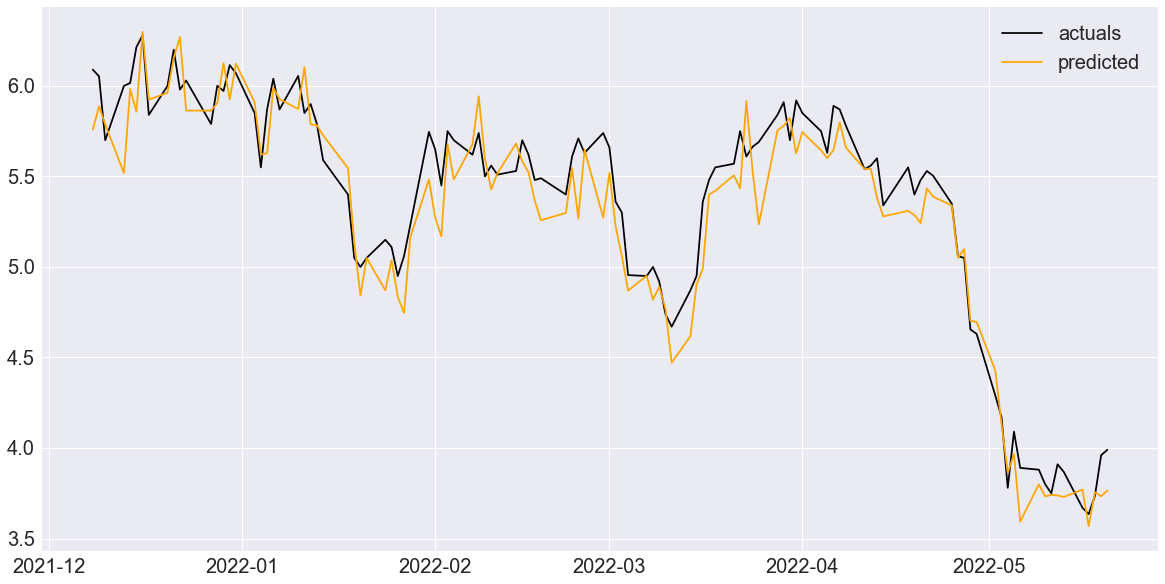

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['trssf_next_close'], color='black')
ax.plot(y_test2['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TRSSF target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   
2017-11-22     11   22  2017        4    14.450    15.290   14.400     15.241   
2017-11-24     11   24  2017        4    15.130    15.130   14.846     15.020   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   
2017-11-22      993600          14.365          15.020     0.876     0.060982   
2017-11-24      499900          15.241          15.440    -0.221    -0.014500   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   
2017-11-22             14.4190             0.1552              14.9301   
2017-11-24             14.7190             0.3000              14.9061   
...                        ...                ...                  ...   
2022-05-17              5.5780             0.0900               5.7590   
2022-05-18              5.7000             0.1220               5.6510   
2022-05-19              5.8000             0.1000               5.6310   
2022-05-20              5.7200            -0.0800               5.5860   
2022-05-23              5.6120            -0.1080               5.5500   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179       0.000        0.00      0.000   
2017-11-20             -0.0731       0.000        0.00      0.000   
2017-11-21             -0.1117       0.000        0.00      0.000   
2017-11-22             -0.0219       0.000        0.00      0.000   
2017-11-24             -0.0240       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17             -0.0170       3.973        4.10      3.900   
2022-05-18             -0.1080       3.990        4.07      3.800   
2022-05-19             -0.0200       3.990        4.03      3.840   
2022-05-20             -0.0450       3.990        4.20      3.878   
2022-05-23             -0.0360       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

1020

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

1020
114


In [112]:
X_train3 = train3.drop('trssf_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179         0.0         0.0        0.0   
2017-11-20             -0.0731         0.0         0.0        0.0   
2017-11-21             -0.1117         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2017-11-17          0.0           0.0               0.0               0.0   
2017-11-20          0.0           0.0               0.0               0.0   
2017-11-21          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2017-11-17         0.0            0.0                   0.0   
2017-11-20         0.0            0.0                   0.0   
2017-11-21         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2017-11-17                  0.0                    0.0                   0.0   
2017-11-20                  0.0                    0.0                   0.0   
2017-11-21                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2017-11-17        0.0        0.0       0.0         0.0          0.0   
2017-11-20        0.0        0.0       0.0         0.0          0.0   
2017-11-21        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2017-11-17              0.0              0.0        0.0           0.0   
2017-11-20              0.0              0.0        0.0           0.0   
2017-11-21              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2017-11-17                  0.0                 0.0                   0.0   
2017-11-20                  0.0                 0.0                   0.0   
2017-11-21                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2017-11-17                  0.0         0.0         0.0        0.0   
2017-11-20                  0.0         0.0         0.0       

In [113]:
X_train3.shape

(1020, 263)

In [114]:
y_train3 = train3['trssf_next_close']
y_train3.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-12-03    5.72
2021-12-06    5.72
2021-12-07    5.94
Name: trssf_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('trssf_next_close', axis=1)
y_test3 = test3['trssf_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-08     12    8  2021        4     10.71    11.198   10.355      10.94   
2021-12-09     12    9  2021        4     10.83    11.080   10.190      10.20   
2021-12-10     12   10  2021        4     10.28    10.440    9.540       9.56   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-08     5505400           10.64           10.20      0.30     0.028195   
2021-12-09     6414500           10.94            9.56     -0.74    -0.067642   
2021-12-10     9456100           10.20            9.31     -0.64    -0.062745   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-08              10.416              0.200               10.735   
2021-12-09              10.384             -0.032               10.568   
2021-12-10              10.298             -0.086               10.355   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-08              -0.068        7.56       8.209       7.56   
2021-12-09              -0.167        8.13       8.220       7.88   
2021-12-10              -0.213        7.56       8.007       7.54   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-08         8.13      576200.0             7.754              7.88   
2021-12-09         7.88      548700.0             8.130              7.60   
2021-12-10         7.60      743400.0             7.880              7.25   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-08       0.376       0.048491                7.9648   
2021-12-09      -0.250      -0.030750                7.8908   
2021-12-10      -0.280      -0.035533                7.7928   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-08                0.026                 8.2142               -0.0665   
2021-12-09               -0.074                 8.1202               -0.0940   
2021-12-10               -0.098                 7.9874               -0.1328   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-08       4.51      4.730      4.40        4.60    2149800.0   
2021-12-09       4.54      4.660      4.43        4.49    1764000.0   
2021-12-10       4.49      4.555      4.22        4.26    1974500.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-08             4.51             4.49       0.09      0.019956   
2021-12-09             4.60             4.26      -0.11     -0.023913   
2021-12-10             4.49             4.16      -0.23     -0.051225   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-08                4.398               0.078                 4.467   
2021-12-09                4.416               0.018                 4.435   
2021-12-10                4.436               0.020                 4.394   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-08               -0.008       8.595       9.500      8.595   
2021-12-09               -0.032       9.500       9.640      8

In [118]:
X_test3.shape

(114, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-18    3.735
2022-05-19    3.960
2022-05-20    3.990
Name: trssf_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([5.76650565, 6.16398402, 5.82972809, 5.76907054, 6.01250266])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.20860760436990908


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.17089221988082146


In [124]:
y_train3 = pd.DataFrame(y_train3, columns=['trssf_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['trssf_next_close'])

In [125]:
y_test3['trssf_pred_next_close'] = y_pred3

In [126]:
y_test3.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-16             3.670               3.701139
2022-05-17             3.635               3.392494
2022-05-18             3.735               3.591820
2022-05-19             3.960               3.676908
2022-05-20             3.990               3.642686

In [127]:
hyper_table.append(dict(stock='trssf', 
                        version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        actual_price=y_test3['trssf_next_close'][-1],
                        predicted_price=y_test3['trssf_pred_next_close'][-1],
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

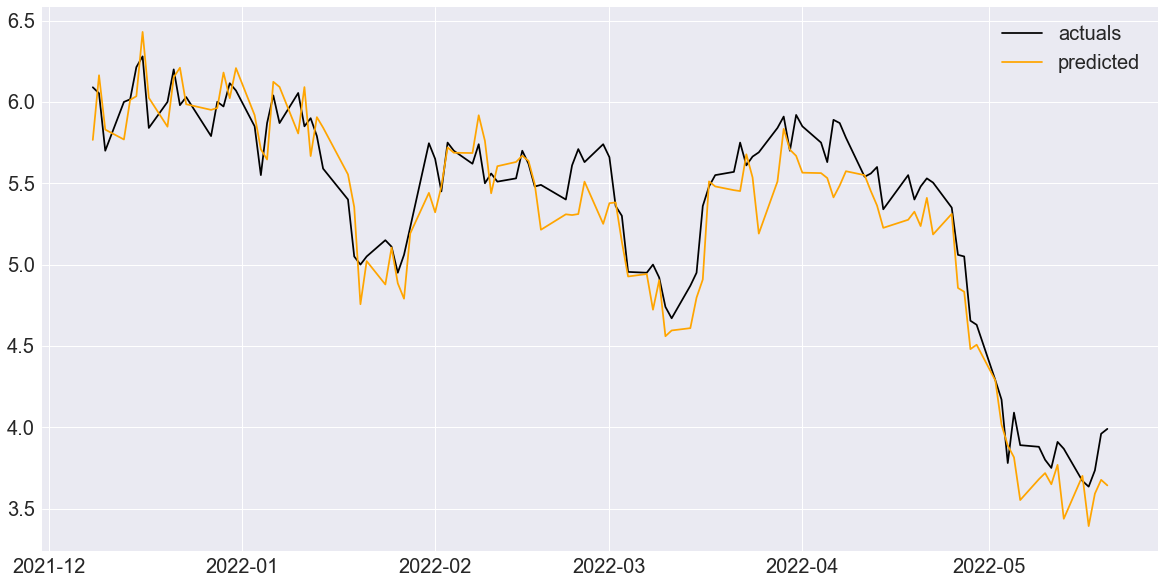

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['trssf_next_close'], color='black')
ax.plot(y_test3['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TRSSF target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   
2017-11-22     11   22  2017        4    14.450    15.290   14.400     15.241   
2017-11-24     11   24  2017        4    15.130    15.130   14.846     15.020   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   
2017-11-22      993600          14.365          15.020     0.876     0.060982   
2017-11-24      499900          15.241          15.440    -0.221    -0.014500   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   
2017-11-22             14.4190             0.1552              14.9301   
2017-11-24             14.7190             0.3000              14.9061   
...                        ...                ...                  ...   
2022-05-17              5.5780             0.0900               5.7590   
2022-05-18              5.7000             0.1220               5.6510   
2022-05-19              5.8000             0.1000               5.6310   
2022-05-20              5.7200            -0.0800               5.5860   
2022-05-23              5.6120            -0.1080               5.5500   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179       0.000        0.00      0.000   
2017-11-20             -0.0731       0.000        0.00      0.000   
2017-11-21             -0.1117       0.000        0.00      0.000   
2017-11-22             -0.0219       0.000        0.00      0.000   
2017-11-24             -0.0240       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17             -0.0170       3.973        4.10      3.900   
2022-05-18             -0.1080       3.990        4.07      3.800   
2022-05-19             -0.0200       3.990        4.03      3.840   
2022-05-20             -0.0450       3.990        4.20      3.878   
2022-05-23             -0.0360       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

1020

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

1020
114


In [142]:
X_train4 = train4.drop('trssf_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179         0.0         0.0        0.0   
2017-11-20             -0.0731         0.0         0.0        0.0   
2017-11-21             -0.1117         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2017-11-17          0.0           0.0               0.0               0.0   
2017-11-20          0.0           0.0               0.0               0.0   
2017-11-21          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2017-11-17         0.0            0.0                   0.0   
2017-11-20         0.0            0.0                   0.0   
2017-11-21         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2017-11-17                  0.0                    0.0                   0.0   
2017-11-20                  0.0                    0.0                   0.0   
2017-11-21                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2017-11-17        0.0        0.0       0.0         0.0          0.0   
2017-11-20        0.0        0.0       0.0         0.0          0.0   
2017-11-21        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2017-11-17              0.0              0.0        0.0           0.0   
2017-11-20              0.0              0.0        0.0           0.0   
2017-11-21              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2017-11-17                  0.0                 0.0                   0.0   
2017-11-20                  0.0                 0.0                   0.0   
2017-11-21                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2017-11-17                  0.0         0.0         0.0        0.0   
2017-11-20                  0.0         0.0         0.0       

In [143]:
X_train4.shape

(1020, 289)

In [144]:
y_train4 = train4['trssf_next_close']
y_train4.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-12-03    5.72
2021-12-06    5.72
2021-12-07    5.94
Name: trssf_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('trssf_next_close', axis=1)
y_test4 = test4['trssf_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-08     12    8  2021        4     10.71    11.198   10.355      10.94   
2021-12-09     12    9  2021        4     10.83    11.080   10.190      10.20   
2021-12-10     12   10  2021        4     10.28    10.440    9.540       9.56   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-08     5505400           10.64           10.20      0.30     0.028195   
2021-12-09     6414500           10.94            9.56     -0.74    -0.067642   
2021-12-10     9456100           10.20            9.31     -0.64    -0.062745   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-08              10.416              0.200               10.735   
2021-12-09              10.384             -0.032               10.568   
2021-12-10              10.298             -0.086               10.355   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-08              -0.068        7.56       8.209       7.56   
2021-12-09              -0.167        8.13       8.220       7.88   
2021-12-10              -0.213        7.56       8.007       7.54   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-08         8.13      576200.0             7.754              7.88   
2021-12-09         7.88      548700.0             8.130              7.60   
2021-12-10         7.60      743400.0             7.880              7.25   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-08       0.376       0.048491                7.9648   
2021-12-09      -0.250      -0.030750                7.8908   
2021-12-10      -0.280      -0.035533                7.7928   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-08                0.026                 8.2142               -0.0665   
2021-12-09               -0.074                 8.1202               -0.0940   
2021-12-10               -0.098                 7.9874               -0.1328   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-08       4.51      4.730      4.40        4.60    2149800.0   
2021-12-09       4.54      4.660      4.43        4.49    1764000.0   
2021-12-10       4.49      4.555      4.22        4.26    1974500.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-08             4.51             4.49       0.09      0.019956   
2021-12-09             4.60             4.26      -0.11     -0.023913   
2021-12-10             4.49             4.16      -0.23     -0.051225   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-08                4.398               0.078                 4.467   
2021-12-09                4.416               0.018                 4.435   
2021-12-10                4.436               0.020                 4.394   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-08               -0.008       8.595       9.500      8.595   
2021-12-09               -0.032       9.500       9.640      8

In [148]:
X_test4.shape

(114, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-18    3.735
2022-05-19    3.960
2022-05-20    3.990
Name: trssf_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([5.71857476, 6.12223066, 5.79893485, 5.71641075, 5.96974462])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.19420767935396524


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.15596546375837295


In [154]:
y_train4 = pd.DataFrame(y_train4, columns=['trssf_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['trssf_next_close'])

In [155]:
y_test4['trssf_pred_next_close'] = y_pred4

In [156]:
y_test4.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-16             3.670               3.759266
2022-05-17             3.635               3.474687
2022-05-18             3.735               3.697394
2022-05-19             3.960               3.669668
2022-05-20             3.990               3.723742

In [157]:
hyper_table.append(dict(stock='trssf', 
                        version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        actual_price=y_test4['trssf_next_close'][-1],
                        predicted_price=y_test4['trssf_pred_next_close'][-1],
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

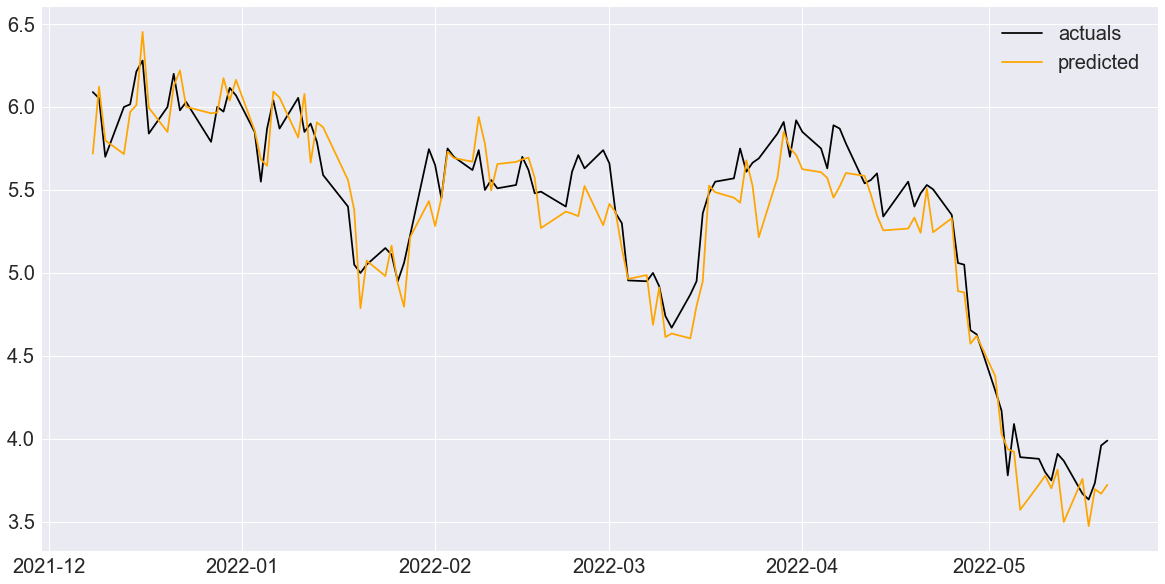

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['trssf_next_close'], color='black')
ax.plot(y_test4['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TRSSF target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   
2017-11-22     11   22  2017        4    14.450    15.290   14.400     15.241   
2017-11-24     11   24  2017        4    15.130    15.130   14.846     15.020   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   
2017-11-22      993600          14.365          15.020     0.876     0.060982   
2017-11-24      499900          15.241          15.440    -0.221    -0.014500   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   
2017-11-22             14.4190             0.1552              14.9301   
2017-11-24             14.7190             0.3000              14.9061   
...                        ...                ...                  ...   
2022-05-17              5.5780             0.0900               5.7590   
2022-05-18              5.7000             0.1220               5.6510   
2022-05-19              5.8000             0.1000               5.6310   
2022-05-20              5.7200            -0.0800               5.5860   
2022-05-23              5.6120            -0.1080               5.5500   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179       0.000        0.00      0.000   
2017-11-20             -0.0731       0.000        0.00      0.000   
2017-11-21             -0.1117       0.000        0.00      0.000   
2017-11-22             -0.0219       0.000        0.00      0.000   
2017-11-24             -0.0240       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17             -0.0170       3.973        4.10      3.900   
2022-05-18             -0.1080       3.990        4.07      3.800   
2022-05-19             -0.0200       3.990        4.03      3.840   
2022-05-20             -0.0450       3.990        4.20      3.878   
2022-05-23             -0.0360       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

1020

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

1020
114


In [172]:
X_train5 = train5.drop('trssf_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179         0.0         0.0        0.0   
2017-11-20             -0.0731         0.0         0.0        0.0   
2017-11-21             -0.1117         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2017-11-17          0.0           0.0               0.0               0.0   
2017-11-20          0.0           0.0               0.0               0.0   
2017-11-21          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2017-11-17         0.0            0.0                   0.0   
2017-11-20         0.0            0.0                   0.0   
2017-11-21         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2017-11-17                  0.0                    0.0                   0.0   
2017-11-20                  0.0                    0.0                   0.0   
2017-11-21                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2017-11-17        0.0        0.0       0.0         0.0          0.0   
2017-11-20        0.0        0.0       0.0         0.0          0.0   
2017-11-21        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2017-11-17              0.0              0.0        0.0           0.0   
2017-11-20              0.0              0.0        0.0           0.0   
2017-11-21              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2017-11-17                  0.0                 0.0                   0.0   
2017-11-20                  0.0                 0.0                   0.0   
2017-11-21                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2017-11-17                  0.0         0.0         0.0        0.0   
2017-11-20                  0.0         0.0         0.0       

In [173]:
X_train5.shape

(1020, 393)

In [174]:
y_train5 = train5['trssf_next_close']
y_train5.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-12-03    5.72
2021-12-06    5.72
2021-12-07    5.94
Name: trssf_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('trssf_next_close', axis=1)
y_test5 = test5['trssf_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-08     12    8  2021        4     10.71    11.198   10.355      10.94   
2021-12-09     12    9  2021        4     10.83    11.080   10.190      10.20   
2021-12-10     12   10  2021        4     10.28    10.440    9.540       9.56   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-08     5505400           10.64           10.20      0.30     0.028195   
2021-12-09     6414500           10.94            9.56     -0.74    -0.067642   
2021-12-10     9456100           10.20            9.31     -0.64    -0.062745   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-08              10.416              0.200               10.735   
2021-12-09              10.384             -0.032               10.568   
2021-12-10              10.298             -0.086               10.355   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-08              -0.068        7.56       8.209       7.56   
2021-12-09              -0.167        8.13       8.220       7.88   
2021-12-10              -0.213        7.56       8.007       7.54   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-08         8.13      576200.0             7.754              7.88   
2021-12-09         7.88      548700.0             8.130              7.60   
2021-12-10         7.60      743400.0             7.880              7.25   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-08       0.376       0.048491                7.9648   
2021-12-09      -0.250      -0.030750                7.8908   
2021-12-10      -0.280      -0.035533                7.7928   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-08                0.026                 8.2142               -0.0665   
2021-12-09               -0.074                 8.1202               -0.0940   
2021-12-10               -0.098                 7.9874               -0.1328   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-08       4.51      4.730      4.40        4.60    2149800.0   
2021-12-09       4.54      4.660      4.43        4.49    1764000.0   
2021-12-10       4.49      4.555      4.22        4.26    1974500.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-08             4.51             4.49       0.09      0.019956   
2021-12-09             4.60             4.26      -0.11     -0.023913   
2021-12-10             4.49             4.16      -0.23     -0.051225   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-08                4.398               0.078                 4.467   
2021-12-09                4.416               0.018                 4.435   
2021-12-10                4.436               0.020                 4.394   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-08               -0.008       8.595       9.500      8.595   
2021-12-09               -0.032       9.500       9.640      8

In [178]:
X_test5.shape

(114, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-18    3.735
2022-05-19    3.960
2022-05-20    3.990
Name: trssf_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([5.87972264, 5.97503885, 5.72303541, 5.70452794, 5.97921155])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.18995957476764283


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.1547989113986922


In [184]:
y_train5 = pd.DataFrame(y_train5, columns=['trssf_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['trssf_next_close'])

In [185]:
y_test5['trssf_pred_next_close'] = y_pred5

In [186]:
y_test5.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-16             3.670               3.800308
2022-05-17             3.635               3.505892
2022-05-18             3.735               3.711384
2022-05-19             3.960               3.828286
2022-05-20             3.990               3.733778

In [187]:
hyper_table.append(dict(stock='trssf', 
                        version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        actual_price=y_test5['trssf_next_close'][-1],
                        predicted_price=y_test5['trssf_pred_next_close'][-1],
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

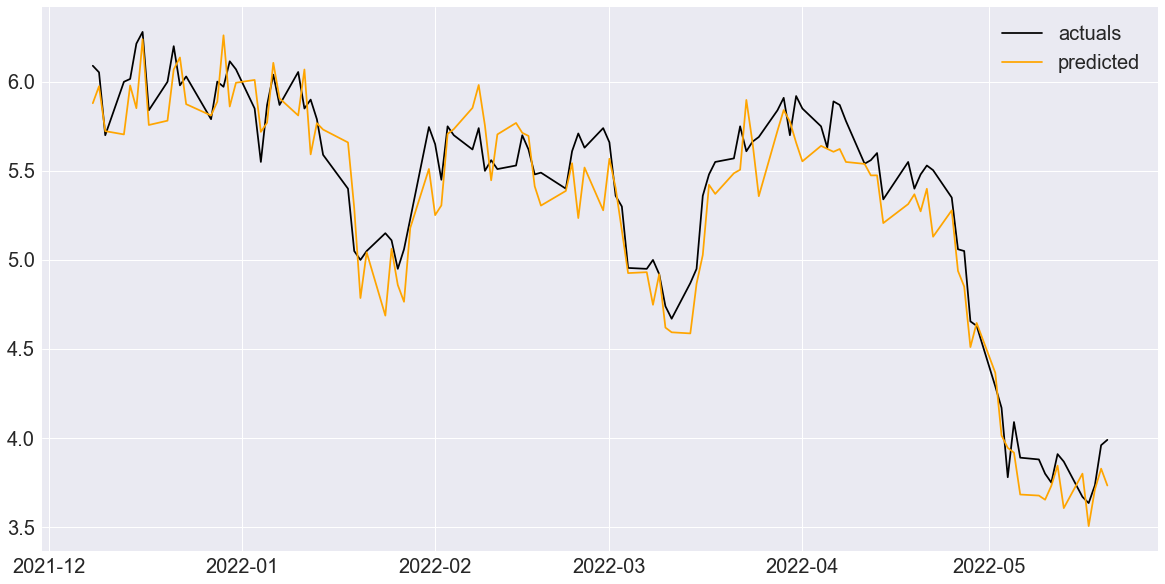

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['trssf_next_close'], color='black')
ax.plot(y_test5['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TRSSF target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   
2017-11-22     11   22  2017        4    14.450    15.290   14.400     15.241   
2017-11-24     11   24  2017        4    15.130    15.130   14.846     15.020   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   
2017-11-22      993600          14.365          15.020     0.876     0.060982   
2017-11-24      499900          15.241          15.440    -0.221    -0.014500   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   
2017-11-22             14.4190             0.1552              14.9301   
2017-11-24             14.7190             0.3000              14.9061   
...                        ...                ...                  ...   
2022-05-17              5.5780             0.0900               5.7590   
2022-05-18              5.7000             0.1220               5.6510   
2022-05-19              5.8000             0.1000               5.6310   
2022-05-20              5.7200            -0.0800               5.5860   
2022-05-23              5.6120            -0.1080               5.5500   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179       0.000        0.00      0.000   
2017-11-20             -0.0731       0.000        0.00      0.000   
2017-11-21             -0.1117       0.000        0.00      0.000   
2017-11-22             -0.0219       0.000        0.00      0.000   
2017-11-24             -0.0240       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17             -0.0170       3.973        4.10      3.900   
2022-05-18             -0.1080       3.990        4.07      3.800   
2022-05-19             -0.0200       3.990        4.03      3.840   
2022-05-20             -0.0450       3.990        4.20      3.878   
2022-05-23             -0.0360       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

1020

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

1020
114


In [202]:
X_train6 = train6.drop('trssf_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179         0.0         0.0        0.0   
2017-11-20             -0.0731         0.0         0.0        0.0   
2017-11-21             -0.1117         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2017-11-17          0.0           0.0               0.0               0.0   
2017-11-20          0.0           0.0               0.0               0.0   
2017-11-21          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2017-11-17         0.0            0.0                   0.0   
2017-11-20         0.0            0.0                   0.0   
2017-11-21         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2017-11-17                  0.0                    0.0                   0.0   
2017-11-20                  0.0                    0.0                   0.0   
2017-11-21                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2017-11-17        0.0        0.0       0.0         0.0          0.0   
2017-11-20        0.0        0.0       0.0         0.0          0.0   
2017-11-21        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2017-11-17              0.0              0.0        0.0           0.0   
2017-11-20              0.0              0.0        0.0           0.0   
2017-11-21              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2017-11-17                  0.0                 0.0                   0.0   
2017-11-20                  0.0                 0.0                   0.0   
2017-11-21                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2017-11-17                  0.0         0.0         0.0        0.0   
2017-11-20                  0.0         0.0         0.0       

In [203]:
X_train6.shape

(1020, 419)

In [204]:
y_train6 = train6['trssf_next_close']
y_train6.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-12-03    5.72
2021-12-06    5.72
2021-12-07    5.94
Name: trssf_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('trssf_next_close', axis=1)
y_test6 = test6['trssf_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-08     12    8  2021        4     10.71    11.198   10.355      10.94   
2021-12-09     12    9  2021        4     10.83    11.080   10.190      10.20   
2021-12-10     12   10  2021        4     10.28    10.440    9.540       9.56   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-08     5505400           10.64           10.20      0.30     0.028195   
2021-12-09     6414500           10.94            9.56     -0.74    -0.067642   
2021-12-10     9456100           10.20            9.31     -0.64    -0.062745   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-08              10.416              0.200               10.735   
2021-12-09              10.384             -0.032               10.568   
2021-12-10              10.298             -0.086               10.355   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-08              -0.068        7.56       8.209       7.56   
2021-12-09              -0.167        8.13       8.220       7.88   
2021-12-10              -0.213        7.56       8.007       7.54   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-08         8.13      576200.0             7.754              7.88   
2021-12-09         7.88      548700.0             8.130              7.60   
2021-12-10         7.60      743400.0             7.880              7.25   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-08       0.376       0.048491                7.9648   
2021-12-09      -0.250      -0.030750                7.8908   
2021-12-10      -0.280      -0.035533                7.7928   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-08                0.026                 8.2142               -0.0665   
2021-12-09               -0.074                 8.1202               -0.0940   
2021-12-10               -0.098                 7.9874               -0.1328   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-08       4.51      4.730      4.40        4.60    2149800.0   
2021-12-09       4.54      4.660      4.43        4.49    1764000.0   
2021-12-10       4.49      4.555      4.22        4.26    1974500.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-08             4.51             4.49       0.09      0.019956   
2021-12-09             4.60             4.26      -0.11     -0.023913   
2021-12-10             4.49             4.16      -0.23     -0.051225   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-08                4.398               0.078                 4.467   
2021-12-09                4.416               0.018                 4.435   
2021-12-10                4.436               0.020                 4.394   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-08               -0.008       8.595       9.500      8.595   
2021-12-09               -0.032       9.500       9.640      8

In [208]:
X_test6.shape

(114, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-18    3.735
2022-05-19    3.960
2022-05-20    3.990
Name: trssf_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([5.83708422, 5.95385289, 5.74396607, 5.68591595, 5.99264627])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.19179416092181142


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.15621522108118202


In [214]:
y_train6 = pd.DataFrame(y_train6, columns=['trssf_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['trssf_next_close'])

In [215]:
y_test6['trssf_pred_next_close'] = y_pred6

In [216]:
y_test6.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-16             3.670               3.790238
2022-05-17             3.635               3.507591
2022-05-18             3.735               3.691945
2022-05-19             3.960               3.770926
2022-05-20             3.990               3.748598

In [217]:
hyper_table.append(dict(stock='trssf', 
                        version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        actual_price=y_test6['trssf_next_close'][-1],
                        predicted_price=y_test6['trssf_pred_next_close'][-1],
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

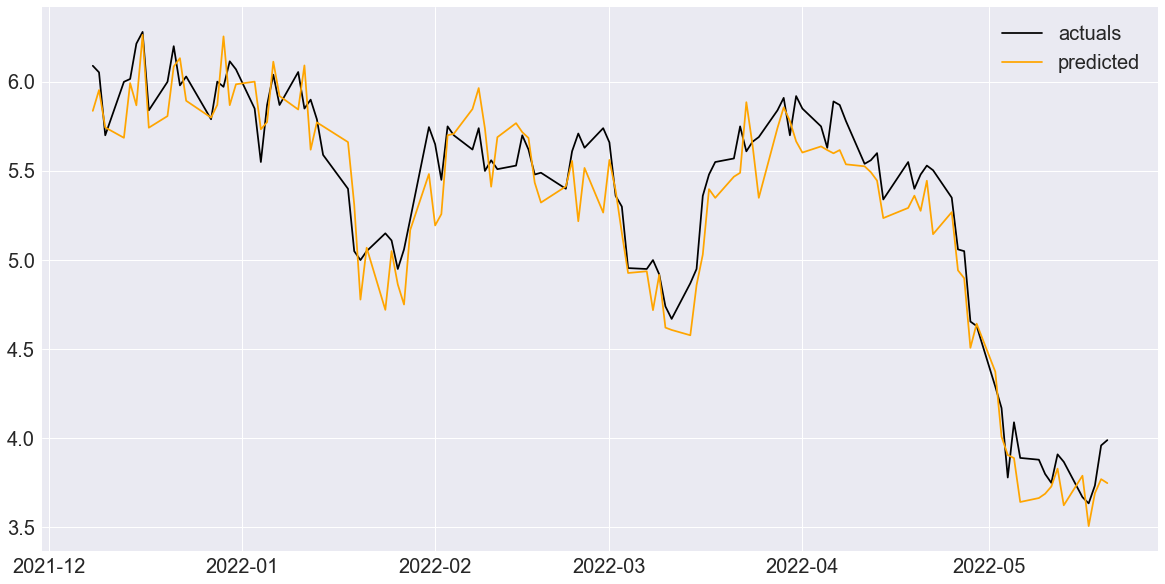

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['trssf_next_close'], color='black')
ax.plot(y_test6['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

stock       version               model      rmse       mae  actual_price  \
1  trssf        1+ETFs  LinearRegression()  0.162104  0.126405          3.99   
2  trssf    1+ETFs+Dow  LinearRegression()  0.179819  0.141708          3.99   
0  trssf         1+Dow  LinearRegression()  0.186863  0.148197          3.99   
5  trssf      All+ETFs  LinearRegression()  0.189960  0.154799          3.99   
6  trssf  All+ETFs+Dow  LinearRegression()  0.191794  0.156215          3.99   
4  trssf       All+Dow  LinearRegression()  0.194208  0.155965          3.99   
3  trssf    All stocks  LinearRegression()  0.208608  0.170892          3.99   

   predicted_price  rows  train_rows  test_rows  columns  
1         3.773157  1134        1020        114      160  
2         3.764379  1134        1020        114      186  
0         4.032301  1134        1020        114       56  
5         3.733778  1134        1020        114      394  
6         3.748598  1134        1020        114      420  
4         3.723742  1134        1020        114      290  
3         3.642686  1134        1020        114      264

In [220]:
hyper_table_trssf = hyper_table.head(1)
hyper_table_trssf

stock version               model      rmse       mae  actual_price  \
1  trssf  1+ETFs  LinearRegression()  0.162104  0.126405          3.99   

   predicted_price  rows  train_rows  test_rows  columns  
1         3.773157  1134        1020        114      160

In [221]:
hyper_table_trssf.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table_trssf.csv', index=True)

## Simulation - Sell

In [222]:
trssf_sim = df1[n:]
trssf_sim = trssf_sim[['trssf_Open', 'trssf_Close']]
trssf_sim.head()

trssf_Open  trssf_Close
Date                               
2021-12-08        5.55        5.940
2021-12-09        6.38        6.090
2021-12-10        5.97        6.053
2021-12-13        5.88        5.700
2021-12-14        6.00        6.000

In [223]:
trssf_sim.shape

(114, 2)

In [224]:
trssf_sim.tail()

trssf_Open  trssf_Close
Date                               
2022-05-16       3.910        3.868
2022-05-17       3.919        3.670
2022-05-18       3.600        3.635
2022-05-19       3.520        3.735
2022-05-20       3.750        3.960

In [225]:
trssf_sim['trssf_Pred_Close'] = y_pred1
trssf_sim.head()

trssf_Open  trssf_Close  trssf_Pred_Close
Date                                                 
2021-12-08        5.55        5.940          5.823365
2021-12-09        6.38        6.090          5.970249
2021-12-10        5.97        6.053          5.801818
2021-12-13        5.88        5.700          5.584031
2021-12-14        6.00        6.000          6.030651

In [226]:
trssf_sim['Trade'] = trssf_sim['trssf_Pred_Close'] > trssf_sim['trssf_Open']
trssf_sim.head()

trssf_Open  trssf_Close  trssf_Pred_Close  Trade
Date                                                        
2021-12-08        5.55        5.940          5.823365   True
2021-12-09        6.38        6.090          5.970249  False
2021-12-10        5.97        6.053          5.801818  False
2021-12-13        5.88        5.700          5.584031  False
2021-12-14        6.00        6.000          6.030651   True

In [227]:
trssf_sim = trssf_sim[trssf_sim['Trade']==True]
trssf_sim.head()

trssf_Open  trssf_Close  trssf_Pred_Close  Trade
Date                                                        
2021-12-08       5.550        5.940          5.823365   True
2021-12-14       6.000        6.000          6.030651   True
2021-12-16       5.706        6.214          6.335314   True
2021-12-21       5.840        6.000          6.183724   True
2021-12-22       5.863        6.200          6.364464   True

In [228]:
trssf_sim['Gains'] = (trssf_sim['trssf_Close'] - trssf_sim['trssf_Open'])*100
trssf_sim.head()

trssf_Open  trssf_Close  trssf_Pred_Close  Trade  Gains
Date                                                               
2021-12-08       5.550        5.940          5.823365   True   39.0
2021-12-14       6.000        6.000          6.030651   True    0.0
2021-12-16       5.706        6.214          6.335314   True   50.8
2021-12-21       5.840        6.000          6.183724   True   16.0
2021-12-22       5.863        6.200          6.364464   True   33.7

In [229]:
total_gains = trssf_sim['Gains'].sum()
print(round(total_gains, 2))

1040.1
